In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('insurance.txt')
poly = PolynomialFeatures(4, include_bias= False)
X = data.iloc[:, :3]
X = poly.fit_transform(X)
X = (X - X.mean(axis= 0)) / X.std(axis= 0)
y = data.iloc[:, 3]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train
X_test = X_test
y_train = y_train.to_numpy().reshape((y_train.shape[0], 1))
y_test = y_test.to_numpy().reshape((y_test.shape[0], 1))

In [4]:
class RidgeRegression:
    def __init__(self, learning_rate= 0.01, n_iters= 1000, lambda_r= 1):
        self.lr = learning_rate
        self.iterations = n_iters
        self.lambda_r = lambda_r
        self.theta = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.random.random_sample((n_features, 1))
        self.bias = np.random.random_sample()
        loss = []

        for _ in range(self.iterations):
            linear_model = X @ self.theta + self.bias
            d_theta = (1 / n_samples) * ( -(2 * (X.T @ (y - linear_model))) + (2 * self.lambda_r * self.theta))
            d_bias = (1 / n_samples) * (- 2 * np.sum(y - linear_model))
            self.theta -= self.lr * d_theta
            self.bias -= self.lr * d_bias
            loss.append(self._calculate_cost(y, linear_model, self.lambda_r, self.theta))
        self.loss = loss

    def predict(self, X):
        return X @ self.theta + self.bias
    
    def cost(self):
        return self.loss

    def _calculate_cost(self, y, z, lambda_r, theta):
        n_samples = y.shape[0] 
        ridge_loss = (1/n_samples) * np.sum(np.square(y - z)) + (0.5 * lambda_r * np.sum(np.square(theta)))
        return np.sqrt(ridge_loss) 

In [33]:
ridge = RidgeRegression(learning_rate= 0.01, n_iters= 1000, lambda_r= 1)
ridge.fit(X_train, y_train)
y_predicted_r = ridge.predict(X_train) 
y_predicted[:5]
cost_ridge = ridge.cost()

In [13]:
class LassoRegression:
    def __init__(self, learning_rate= 0.01, n_iters= 1000, lambda_l= 1):
        self.lr = learning_rate
        self.iterations = n_iters
        self.lambda_l = lambda_l
        self.theta = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.random.random_sample((n_features, 1))
        self.bias = np.random.random_sample()

        loss = []
        for _ in range(self.iterations):
            linear_model = X @ self.theta + self.bias
            d_theta = np.zeros((n_features, 1))
            for j in range(n_features):
                if self.theta[j] > 0:
                    d_theta[j] = (1 / n_samples) * ( -(2 * (X[:, j] @ (y - linear_model))) + self.lambda_l)
                else:
                    d_theta[j] = (1 / n_samples) * ( -(2 * (X[:, j] @ (y - linear_model))) - self.lambda_l)
            d_bias = (1 / n_samples) * (- 2 * np.sum(y - linear_model))
            self.theta -= self.lr * d_theta
            self.bias -= self.lr * d_bias
            loss.append(self._calculate_cost(y, linear_model, self.lambda_l, self.theta))
        self.loss = loss
    def predict(self, X):
        return X @ self.theta + self.bias
    
    def cost(self):
        return self.loss

    def _calculate_cost(self, y, z, lambda_l, theta):
        n_samples = y.shape[0] 
        lasso_loss = (1/n_samples) * np.sum(np.square(y - z)) + (lambda_l * np.sum(np.abs(theta)))
        return np.sqrt(lasso_loss) 


In [34]:
lasso = LassoRegression(learning_rate= 0.01, n_iters= 1000, lambda_l= 500)
lasso.fit(X_train, y_train)
y_predicted_l = lasso.predict(X_train)
cost_lasso = lasso.cost()

In [23]:
from matplotlib import pyplot as plt

In [25]:
def plot_function(cost):
    iterations = [i for i in range(1, 1001)]
    fig, ax = plt.subplots()
    ax.plot(iterations, cost, color='red')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs Iterations')

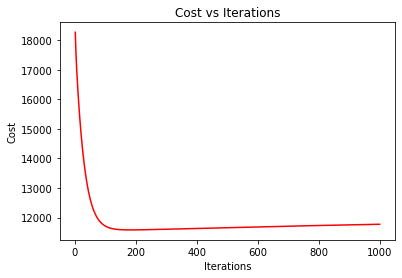

In [26]:
plot_function(cost_ridge)

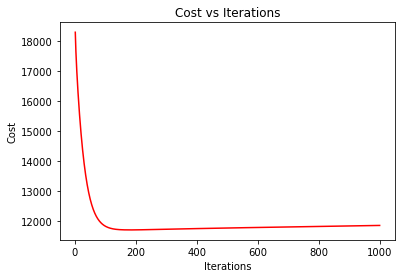

In [27]:
plot_function(cost_lasso)

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [48]:
def surface_plot(X, y, prediction, degree):
  fig = plt.figure(figsize=[30, 50])
  ax = fig.add_subplot(5, 2, degree, projection='3d')
  ax.scatter(X[:,0], X[:,1], y, zdir='z', s=20, c='#9467bd', depthshade=True)
  Y_plot = np.asarray(prediction)
  X = np.asarray(X)
  ax.plot_trisurf(X[:, 0], X[:, 1], Y_plot[:, 0], cmap = 'viridis')
  ax.set_xlabel('$Age$', fontsize=10, rotation=150)
  ax.set_ylabel('$BMI$', fontsize=10, rotation=150)
  ax.set_zlabel('$Insurance$', fontsize=10, rotation=60)
  ax.set_title('Degree: ' + str(degree), fontsize=20)
  plt.show()

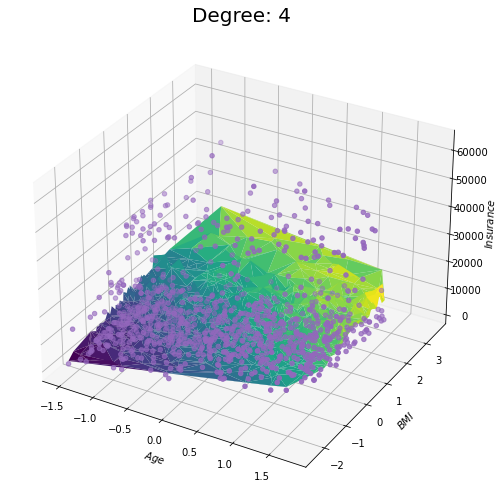

In [49]:
surface_plot(X_train, y_train, y_predicted_r, 4)

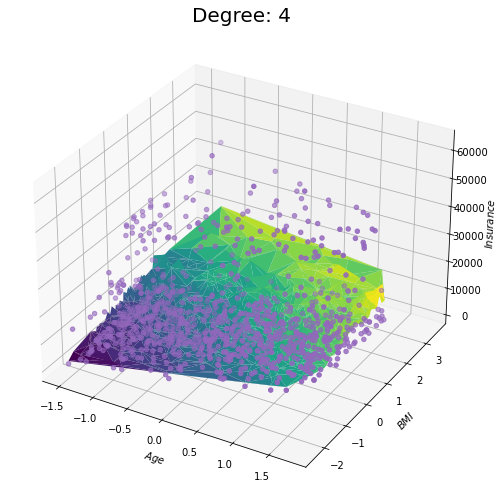

In [50]:
surface_plot(X_train, y_train, y_predicted_l, 4)